In [7]:
import os,sys, csv, time
import pandas as pd
import numpy as np


bots = pd.read_csv("data/bots_data.csv",encoding='ISO-8859-1')
nonbots = pd.read_csv('data/nonbots_data.csv',encoding='ISO-8859-1')
bots

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,3.299611e+09,3299611091,emojitoemoji,NaN,a bot by @inky // source: https://t.co/MJyd6NkYaf,http://t.co/PdagJGIwEp,93,0,24,Tue May 26 18:23:01 +0000 2015,0,False,5145,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,[face] to [face],1
1052,7.450000e+17,7.45E+17,gridgenerator,NaN,Simple generated grids three times a day. bot ...,NaN,36,1,11,Tue Jun 21 15:26:48 +0000 2016,0,False,793,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,grids grids grids,1
1053,2.598999e+09,2598999212,moltar_ebooks,NaN,NaN,NaN,60,32,6,Wed Jul 02 03:10:52 +0000 2014,2,False,4365,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,MOLTAR EBOOKS,1
1054,2.386845e+09,2386845055,DCell_papers,Manchester,Journal paper feed for academics interested in...,NaN,214,0,20,3/13/2014 11:41,0,False,9727,en,Kynurenic acid downregulates IL-17/1L-23 axis ...,True,False,False,Dendritic cells,1


#### Plot 1: Followers vs Following Count

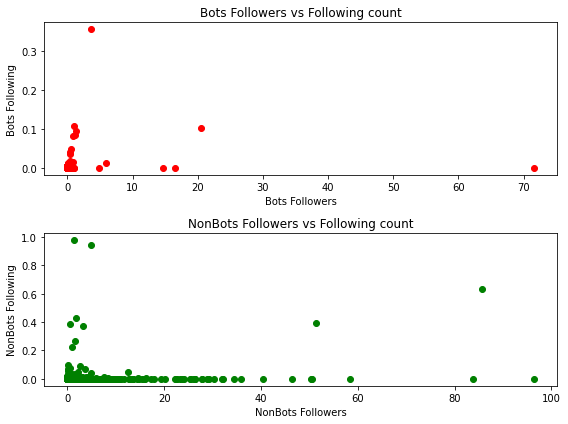

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
bots_followers = bots.followers_count/100000
bots_friends = bots.friends_count/1000000
plt.scatter(bots_followers, bots_friends, color='red')
plt.xlabel("Bots Followers")
plt.ylabel("Bots Following")
plt.title("Bots Followers vs Following count")

plt.subplot(2, 1, 2)
nonbots_followers = nonbots.followers_count/1000000
nonbots_friends = nonbots.friends_count/1000000
plt.scatter(nonbots_followers, nonbots_friends, color='green')
plt.xlabel("NonBots Followers")
plt.ylabel("NonBots Following")
plt.title("NonBots Followers vs Following count")

plt.tight_layout()
plt.show()

#### Plot 2: Frequecy of appearance of Bots vs NonBots in ScreenName

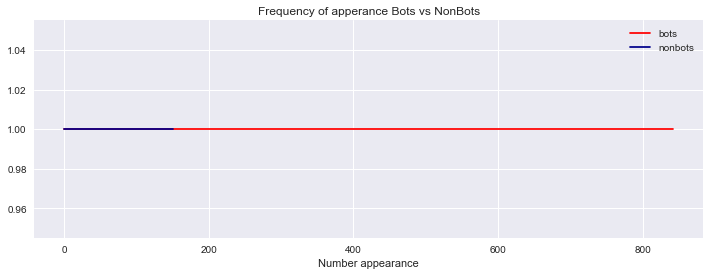

In [108]:
x = bots[(bots.screen_name.str.contains("bot", case=False)==True)].screen_name_binary[:150]
y = nonbots[(nonbots.screen_name.str.contains("bot", case=False)==False)].screen_name_binary[:150]

plt.figure(figsize=(12,4))
plt.plot(x, color='red', label='bots')
plt.plot(y, color='darkblue', label='nonbots')
plt.xlabel('Frequency of bots')
plt.xlabel('Number appearance')
plt.legend(loc='upper right')
plt.title('Frequency of apperance Bots vs NonBots')

In [10]:
def vectorize_bots(bots, condition):
    bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
    bots['description_binary'] = (bots.description.str.contains("bot", case=False)==True)
    bots['location_binary'] = (bots.location.isnull())
    bots['verified_binary'] = (bots.verified==False)
    return bots

def vectorize_nonbots(nonbots, condition):
    nonbots['screen_name_binary'] = (nonbots.screen_name.str.contains("bot", case=False)==False)
    nonbots['description_binary'] = (nonbots.description.str.contains("bot", case=False)==False)
    nonbots['location_binary'] = (nonbots.location.isnull()==False)
    nonbots['verified_binary'] = (nonbots.verified==True)
    return nonbots


#Creating Bots identifying condition
#bots[bots.listedcount>10000]
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)
bots = vectorize_bots(bots, condition)
print("Bots shape: {0}".format(bots.shape))

#Creating NonBots identifying condition
condition = (nonbots.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)
nonbots = vectorize_nonbots(nonbots, condition)
print("Nonbots shape: {0}".format(nonbots.shape))

Bots shape: (1056, 24)
Nonbots shape: (1176, 24)


In [12]:
#Joining Bots and NonBots dataframes
df = pd.concat([bots, nonbots])
print("DataFrames created.")
df

DataFrames created.


,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,status,default_profile,default_profile_image,has_extended_profile,name,bot,screen_name_binary,description_binary,location_binary,verified_binary
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,...,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1,True,True,True,True
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,...,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1,False,False,True,True
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,...,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1,False,False,True,True
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,...,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1,True,True,False,True
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,...,"{u'contributors': None, u'truncated': False, u...",True,False,False,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,2.954252e+07,29542525,SophiaFreshness,Worldwide,WE'RE SOO PHREAKIN FRESH!,http://t.co/chQzaf3AZB,5730,301,182,Tue Apr 07 20:55:37 +0000 2009,...,"{u'contributors': None, u'truncated': False, u...",False,False,False,Sophia Fresh,0,True,True,True,True
1172,3.888782e+08,388878150,Mariana_m01,NaN,"COLOMBIA_ôñShawn, UJ, Josh follow. Tyra and c...",NaN,1399,1705,1,Tue Oct 11 13:59:35 +0000 2011,...,"{""created_at"": ""Sun Mar 12 20:20:15 +0000 2017...",False,False,False,Mariana,0,True,True,False,False
1173,3.410462e+07,34104616,nflcommish,New York,Commissioner of the National Football League,http://t.co/7HzuqSDaW4,521127,194,8428,Wed Apr 22 00:14:58 +0000 2009,...,"{u'contributors': None, u'truncated': False, u...",False,False,False,Roger Goodell,0,True,True,True,True
1174,4.222688e+07,42226885,vkhosla,NaN,entrepreneurship zealot,http://t.co/2PPD7IC9Yq,505217,276,7111,Sun May 24 15:23:09 +0000 2009,...,"{u'contributors': None, u'truncated': False, u...",False,False,False,Vinod Khosla,0,True,True,False,True


In [13]:
#Splitting data randombly into train_df and test_df
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2)
print("Randomly splitting the dataset into training and test, and training classifiers.\n")

Randomly splitting the dataset into training and test, and training classifiers.



### Using Decision Tree Classifier

In [14]:
#Using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='entropy')

#80%
X_train = train_df[['screen_name_binary', 'description_binary', 'location_binary', 'verified_binary']] #train_data
y_train = train_df['bot'] #train_target

#20%
X_test = test_df[['screen_name_binary', 'description_binary', 'location_binary', 'verified_binary']] #test_Data
y_test = test_df['bot'] #test_target

#Training on decision tree classifier
model = clf.fit(X_train, y_train)

#Predicting on test data
predicted = model.predict(X_test)

#Checking accuracy
print("Decision Tree Classifier Accuracy: {0}".format(accuracy_score(y_test, predicted)))

Decision Tree Classifier Accuracy: 0.9328859060402684
